#### EXPLORATORY DATA ANALYSIS
---

In this chapter we will perform EDA where we will use visualizations such as pie charts, Histograms ,line charts etc which will be usefull in identifying patterns in the data.

In [ ]:
 # Importing the Necessary Libraries
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency ,fisher_exact
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix , precision_score , recall_score , f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
 # Setting up the visualization style 
sns.set_style( style = 'darkgrid' )
sns.set_palette( palette = 'icefire' )

In [7]:
DATA = pd.read_csv( 'CLEANED DATA.csv' )

<Figure size 3000x2000 with 0 Axes>

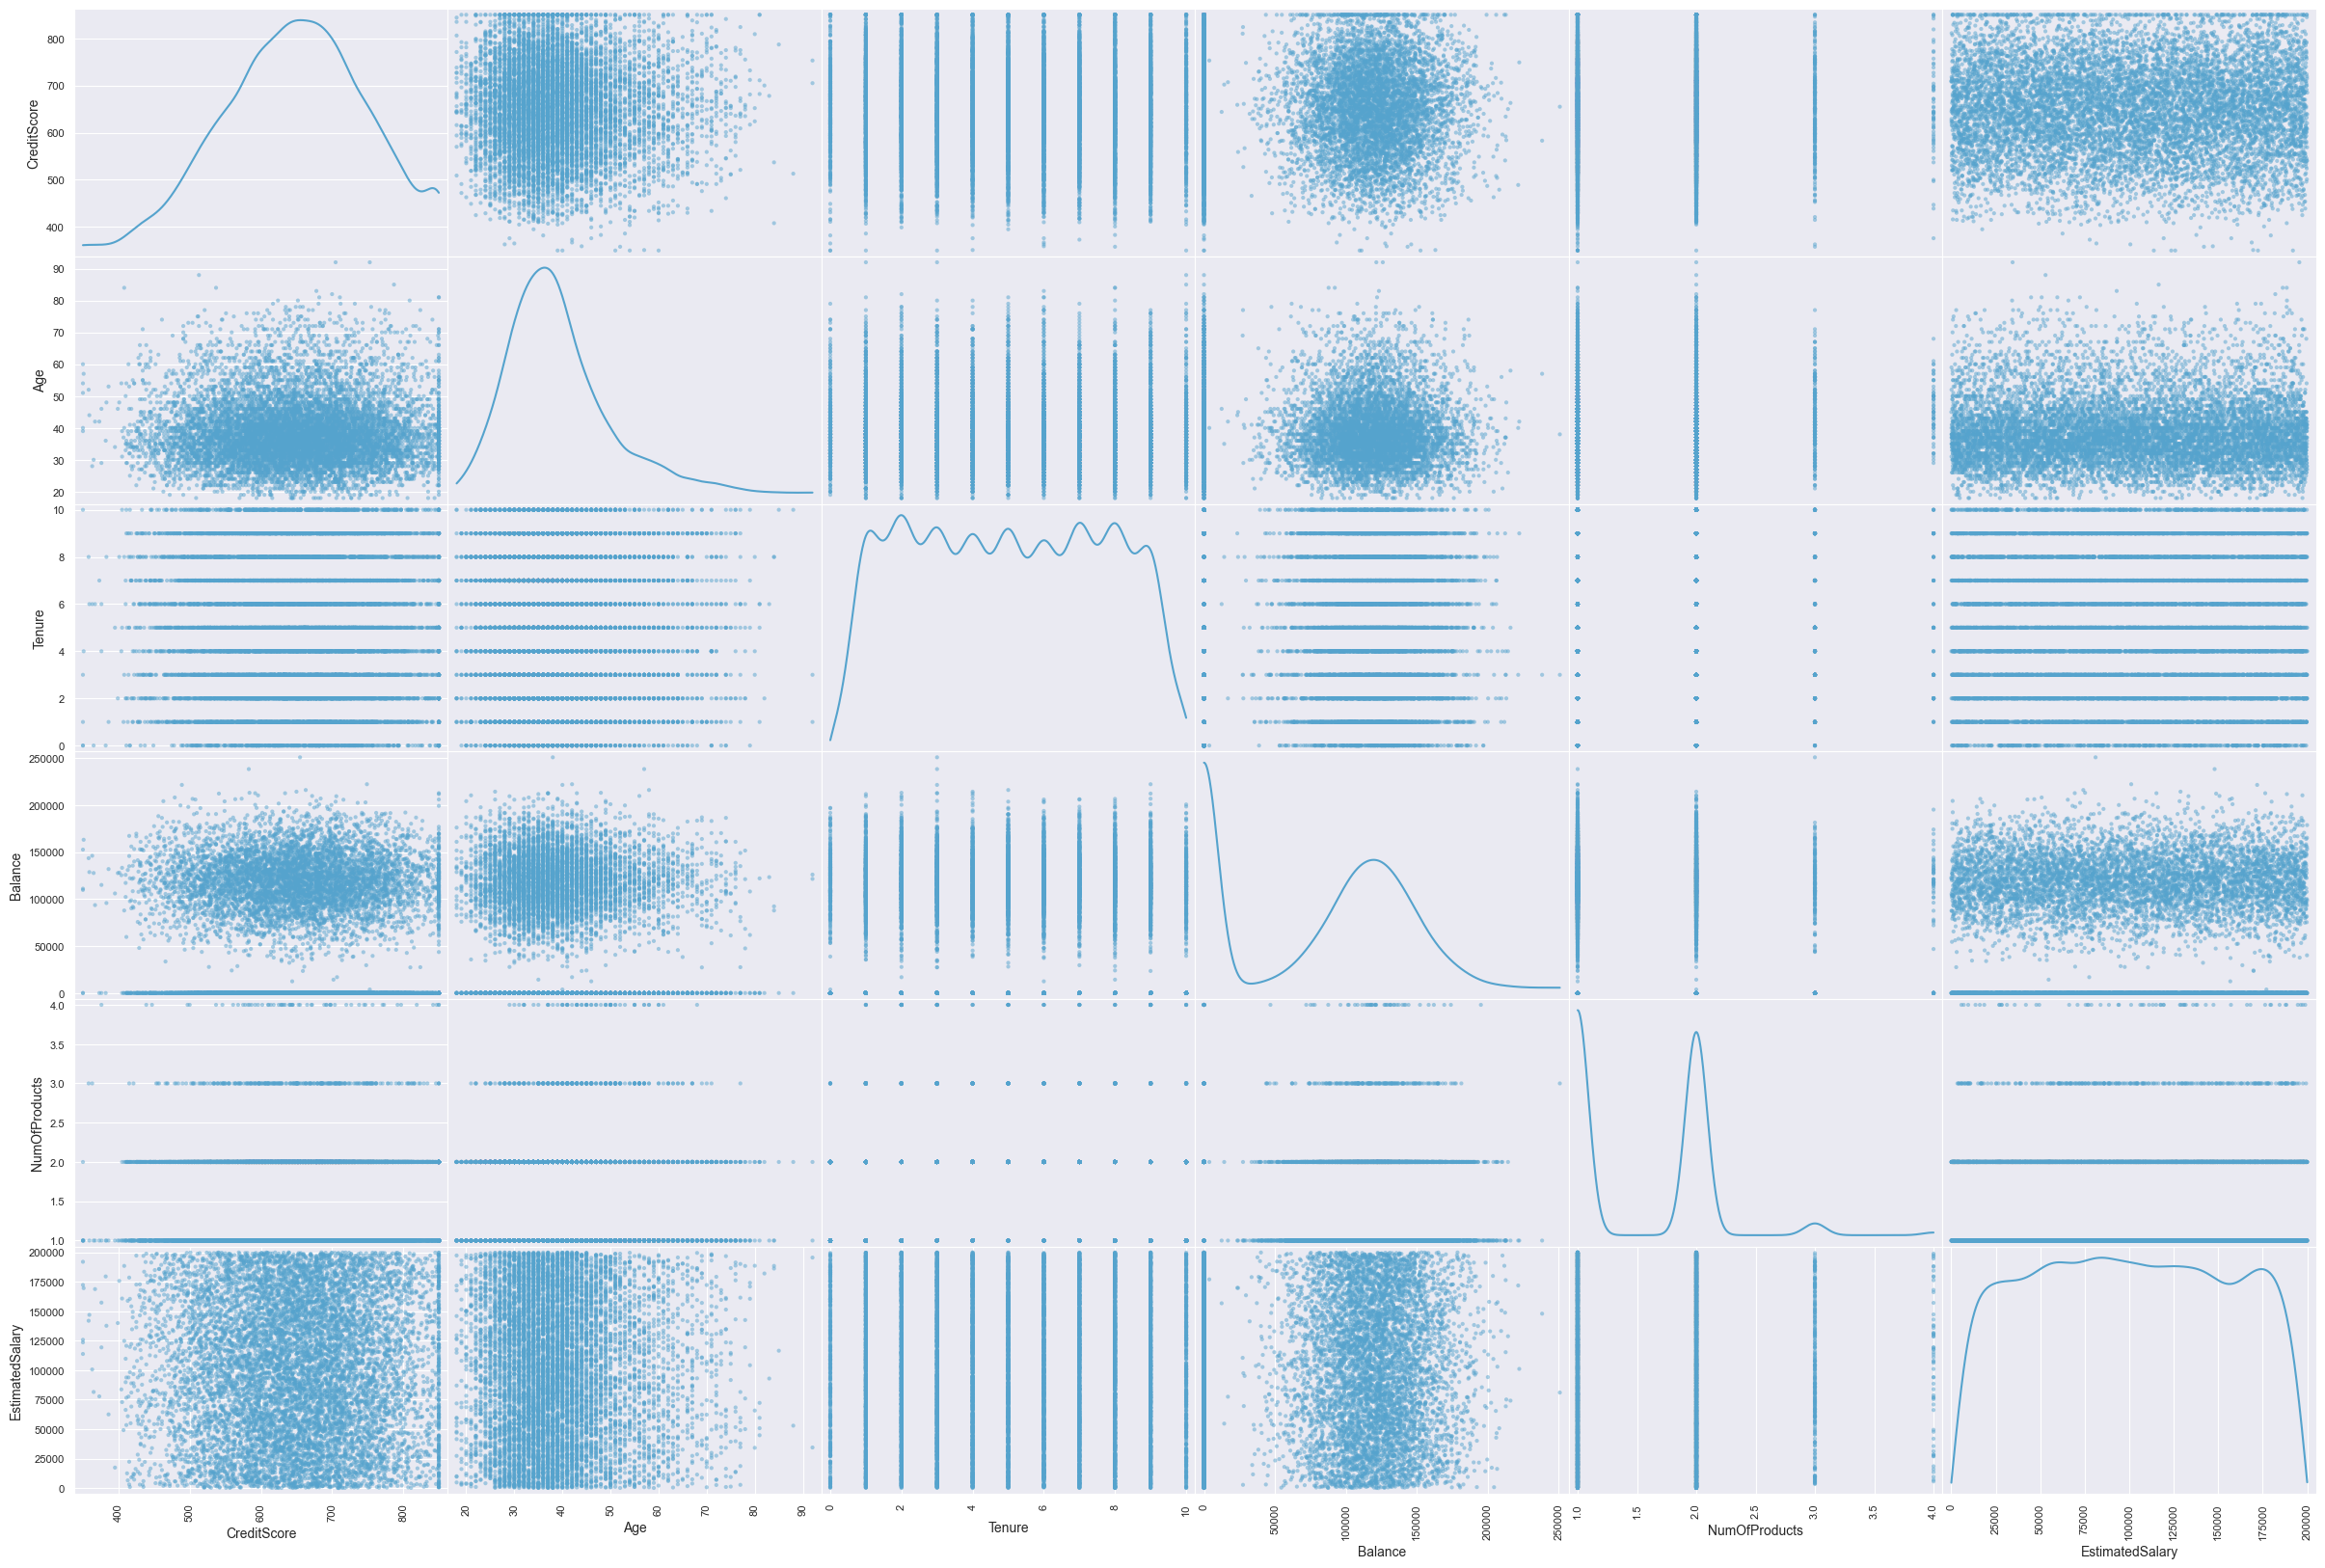

In [8]:
 # Getting the Numerical data
DATA_nums = DATA.select_dtypes( include = ['float64','int64'])

 # plotting Scatter Matrix
plt.figure( figsize = (30,20) )
pd.plotting.scatter_matrix( DATA_nums , figsize = ( 30 , 20 ) , diagonal = 'kde' )

plt.show()


We can see that  none of the variables have a linear relationship.

We can also see that :

- The CreditScore is negativley (leftly) skewed where most credit scores are between 600 - 750

- Age is positively (rightly) skewed.

- Balance has a normal distribution but most people have a balance of 0.

- The Estimated salary is Uniformly distributed.

We can also see that :

- Most customers have 1 product.

- Most customers have a credit card and most customers in the dataframe are active members

We will then calculate the correlation of the  features
    

<function matplotlib.pyplot.show(close=None, block=None)>

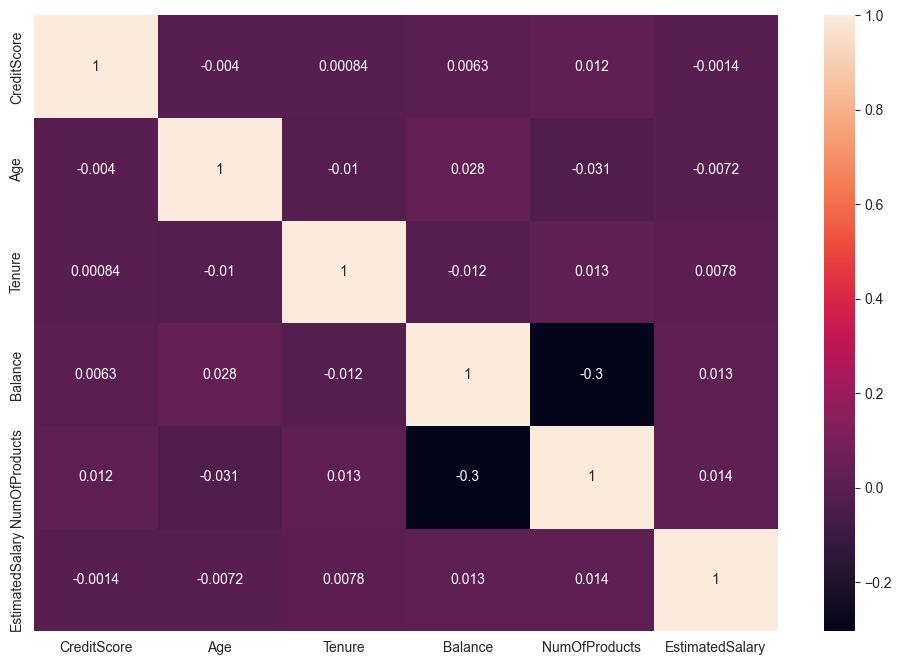

In [9]:
 # Correlation
corr = DATA_nums.corr()

 # ploting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap( corr ,annot = True )

plt.show

From the output, we observe that the correlation between the variables is low, indicating the absence of a strong linear relationship among them.

Since our target variable is 'Churned', we will visualize the distribution of customers who have churned, grouping them by various features across the dataset.

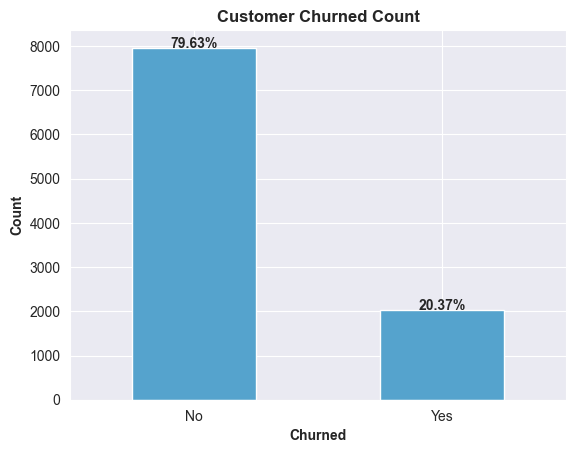

In [10]:
# Count the occurrences of each category in the 'Churned' column
churn_counts = DATA['Churned'].value_counts()

# Calculate the percentages
churn_percentages = churn_counts / churn_counts.sum() * 100

# Plot the counts as a bar plot
ax = churn_counts.plot( kind = 'bar' )

# Add labels and title
plt.title('Customer Churned Count', fontweight='bold')
plt.xlabel('Churned', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xticks(rotation=0)

# Annotate the bars with percentages
for i in range(len(churn_counts)):
    count = churn_counts.iloc[i]
    percentage = churn_percentages.iloc[i]
    ax.text(i, count + 0.5, f'{percentage:.2f}%', ha='center', fontweight='bold')


plt.show()

The plot shows that 20.37% of customers have churned, while 79.63% have remained with the bank

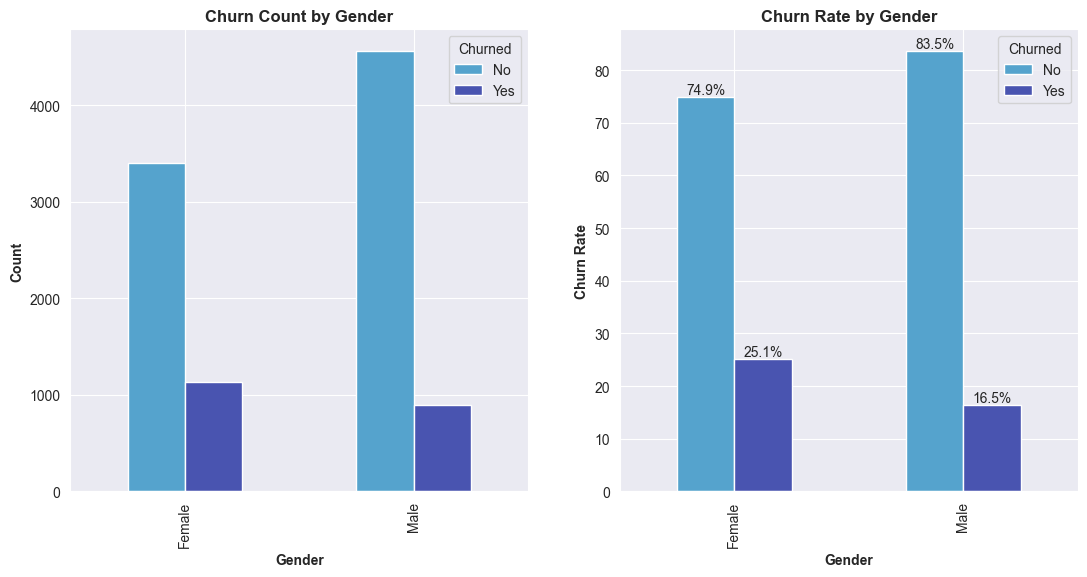

In [11]:
 # Getting the contingency table 
crosstab1 = pd.crosstab( DATA['Gender'] , DATA['Churned'] ) 
crosstab_1 = pd.crosstab( DATA['Gender'] , DATA['Churned'] , normalize = 'index' ) * 100

# Plotting the bar plot with the crosstab result
fig , ax = plt.subplots( 1 , 2 ,figsize = ( 13, 6 ))

crosstab1.plot(kind='bar', stacked=False, ax = ax[0])
crosstab_1.plot(kind='bar', stacked=False, ax = ax[1])

ax[0].set_title( 'Churn Count by Gender' , fontweight = 'bold')
ax[0].set_ylabel( 'Count' , fontweight = 'bold')
ax[0].set_xlabel('Gender' , fontweight = 'bold')

ax[1].set_title( 'Churn Rate by Gender' , fontweight = 'bold')
ax[1].set_ylabel( 'Churn Rate' , fontweight = 'bold')
ax[1].set_xlabel('Gender' , fontweight = 'bold')

 # Annotating the bars 
for p in ax[1].patches:
    height = p.get_height()
    
    ax[1].annotate(f'{height:.1f}%', 
                (p.get_x() + p.get_width() / 2., height),  
                ha='center', va='bottom')  

plt.show()



From the plot we can see that the number of male customers is higher than the feamale customers and that the female customers have a higher churn rate than male customers.Where female customers have a churn rate of 25.1% and male customers have a churn rate of 16.5%.

To Further check for relationship between the variables we will perform Chi square Test 

In [12]:
 # Performing Chi square test
chi2 , p , dof , expected = chi2_contingency( crosstab1 )

print('chi2 value : ' ,chi2) 
print( 'p value : ' , p )

# performing Fisher test 
odds_ratio , p_fisher = fisher_exact( crosstab1 )

print('odds ratio : ', odds_ratio )
print('p-value : ', p_fisher )

chi2 value :  112.91857062096116
p value :  2.2482100097131755e-26
odds ratio :  0.5886709055653311
p-value :  2.239738763305684e-26


From the output, we observe a chi-square value of 112.92 and a p-value of 2.25e-26, indicating a statistically significant association between gender and customer churn. Additionally, the odds ratio of 0.588 suggests that one gender (either female or male) is 41% more likely to churn than the other. This, combined with the highly significant p-value, further supports the relationship between gender and churn.

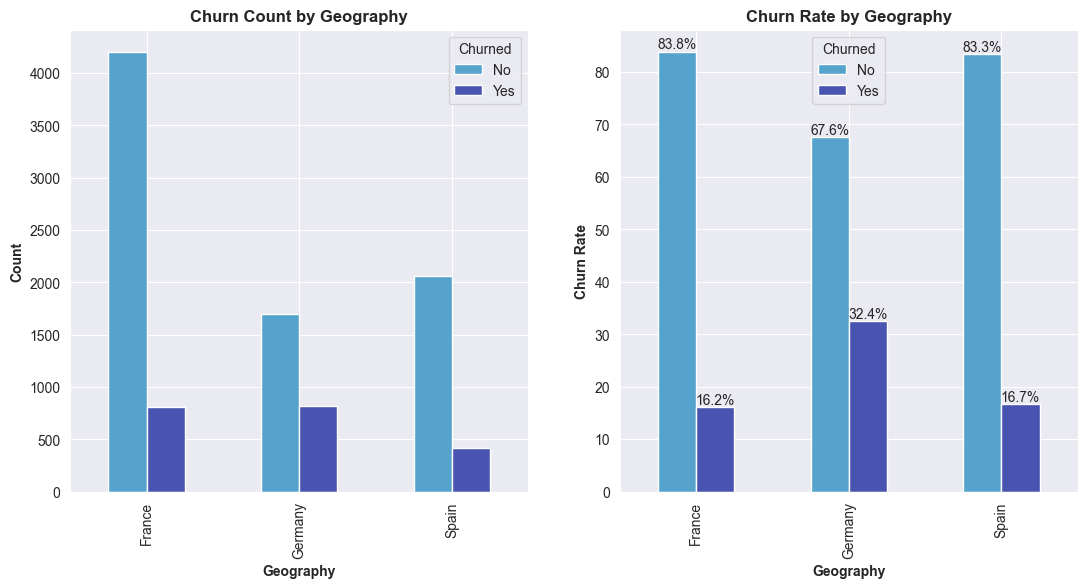

In [13]:
 # Getting the contingency table 
crosstab2 = pd.crosstab( DATA['Geography'] , DATA['Churned'] ) 
crosstab_2 = pd.crosstab( DATA['Geography'] , DATA['Churned'] , normalize = 'index' ) * 100

# Plotting the bar plot with the crosstab result
fig , ax = plt.subplots( 1 , 2 ,figsize = ( 13, 6 ))

crosstab2.plot(kind='bar', stacked=False, ax = ax[0])
crosstab_2.plot(kind='bar', stacked=False, ax = ax[1])

ax[0].set_title( 'Churn Count by Geography' , fontweight = 'bold')
ax[0].set_ylabel( 'Count' , fontweight = 'bold')
ax[0].set_xlabel('Geography' , fontweight = 'bold')

ax[1].set_title( 'Churn Rate by Geography' , fontweight = 'bold')
ax[1].set_ylabel( 'Churn Rate' , fontweight = 'bold')
ax[1].set_xlabel('Geography' , fontweight = 'bold')

 # Annotating the bars 
for p in ax[1].patches:
    height = p.get_height()
    
    ax[1].annotate(f'{height:.1f}%', 
                (p.get_x() + p.get_width() / 2., height),  
                ha='center', va='bottom')  

plt.show()


The data shows that France has the largest customer base, followed by Spain and then Germany. However, Germany experiences the highest churn rate at 32.4%, while Spain follows with 16.7%, and France has the lowest churn rate at 16.2%.

In [14]:
 # Checking for assosiation 
chi2 , p , dof , expected = chi2_contingency( crosstab2 )

print('chi2 value : ' ,chi2) 
print( 'p value : ' , p )

chi2 value :  301.25533682434536
p value :  3.8303176053541544e-66


The output suggests that there exists a statistically significant assosiation between geography and customer churn.

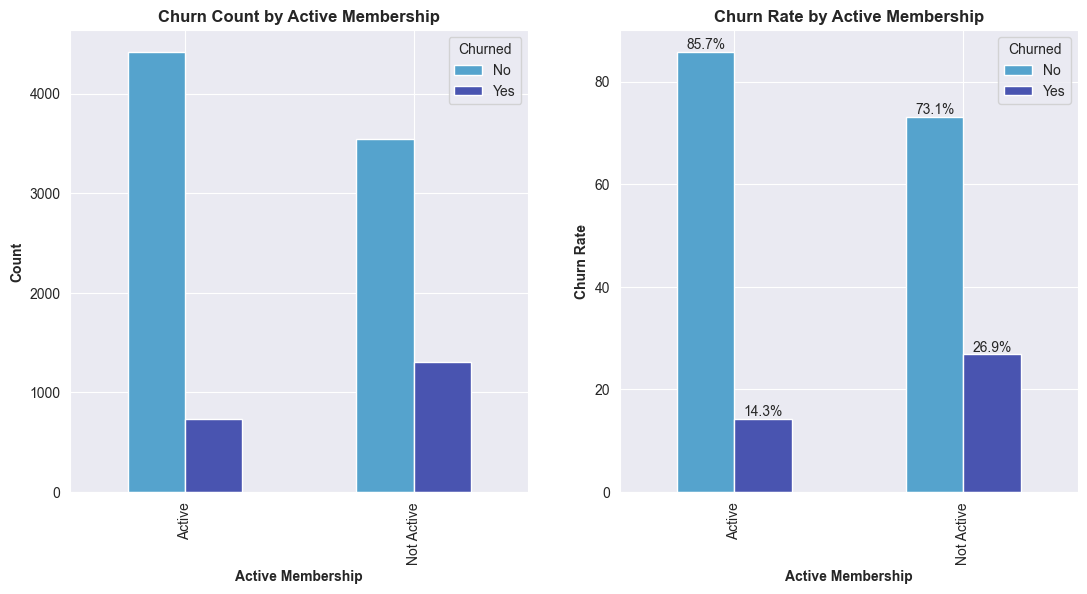

In [15]:
 # Getting the contingency table 
crosstab3 = pd.crosstab( DATA['IsActiveMember'] , DATA['Churned'] ) 
crosstab_3 = pd.crosstab( DATA['IsActiveMember'] , DATA['Churned'] , normalize = 'index' ) * 100

# Plotting the bar plot with the crosstab result
fig , ax = plt.subplots( 1 , 2 ,figsize = ( 13, 6 ))

crosstab3.plot(kind='bar', stacked=False, ax = ax[0])
crosstab_3.plot(kind='bar', stacked=False, ax = ax[1])

ax[0].set_title( 'Churn Count by Active Membership' , fontweight = 'bold')
ax[0].set_ylabel( 'Count' , fontweight = 'bold')
ax[0].set_xlabel('Active Membership' , fontweight = 'bold')

ax[1].set_title( 'Churn Rate by Active Membership' , fontweight = 'bold')
ax[1].set_ylabel( 'Churn Rate' , fontweight = 'bold')
ax[1].set_xlabel('Active Membership' , fontweight = 'bold')

 # Annotating the bars 
for p in ax[1].patches:
    height = p.get_height()
    
    ax[1].annotate(f'{height:.1f}%', 
                (p.get_x() + p.get_width() / 2., height),  
                ha='center', va='bottom')  

plt.show()


We observe that the majority of customers are active members of the bank, with a churn rate of 14.3%. In contrast, customers who are not active members exhibit a significantly higher churn rate of 26.9% 

In [16]:
 # Performing Chi square test
chi2 , p , dof , expected = chi2_contingency( crosstab3 )

print('chi2 value : ' ,chi2) 
print( 'p value : ' , p )

# performing Fisher test 
odds_ratio , p_fisher = fisher_exact( crosstab3 )

print('odds ratio : ', odds_ratio )
print('p-value : ', p_fisher )

chi2 value :  242.9853416428796
p value :  8.785858269303832e-55
odds ratio :  2.2054210801884895
p-value :  2.2941606255409976e-55


There is a statistically significant assosiation between Active membership and customer churn and the odds ratio suggests that the odds of one group( Active , Not Active ) churning  is 2.21 times the odds of the other group.

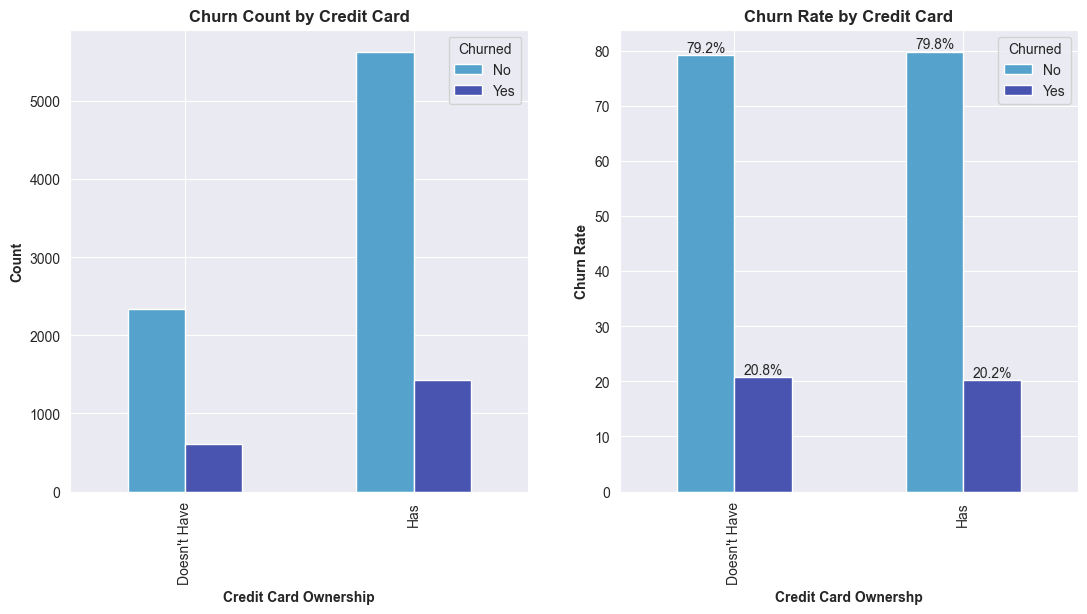

In [17]:
 # Getting the contingency table 
crosstab4 = pd.crosstab( DATA['HasCrCard'] , DATA['Churned'] ) 
crosstab_4 = pd.crosstab( DATA['HasCrCard'] , DATA['Churned'] , normalize = 'index' ) * 100

# Plotting the bar plot with the crosstab result
fig , ax = plt.subplots( 1 , 2 ,figsize = ( 13, 6 ))

crosstab4.plot(kind='bar', stacked=False, ax = ax[0])
crosstab_4.plot(kind='bar', stacked=False, ax = ax[1])

ax[0].set_title( 'Churn Count by Credit Card' , fontweight = 'bold')
ax[0].set_ylabel( 'Count' , fontweight = 'bold')
ax[0].set_xlabel('Credit Card Ownership' , fontweight = 'bold')

ax[1].set_title( 'Churn Rate by Credit Card' , fontweight = 'bold')
ax[1].set_ylabel( 'Churn Rate' , fontweight = 'bold')
ax[1].set_xlabel('Credit Card Ownershp' , fontweight = 'bold')

 # Annotating the bars 
for p in ax[1].patches:
    height = p.get_height()
    
    ax[1].annotate(f'{height:.1f}%', 
                (p.get_x() + p.get_width() / 2., height),  
                ha='center', va='bottom')  

plt.show()


We observe that the majority of customers hold credit cards; however, both credit card holders and non-holders exhibit similar churn rates of approximately 20%. This suggests that the presence of a credit card does not have a significant impact on customer churn.

In [18]:
 # Performing Chi square test
chi2 , p , dof , expected = chi2_contingency( crosstab4 )

print('chi2 value : ' ,chi2) 
print( 'p value : ' , p )
# performing Fisher test 
odds_ratio , p_fisher = fisher_exact( crosstab4 )

print('odds ratio : ', odds_ratio )
print('p-value : ', p_fisher )

chi2 value :  0.47133779904440803
p value :  0.49237236141554697
odds ratio :  0.962038679495904
p-value :  0.47891621052548056


We can conclude that from our output that there is no statistically significant assosiation between credit card ownership and customer churn.

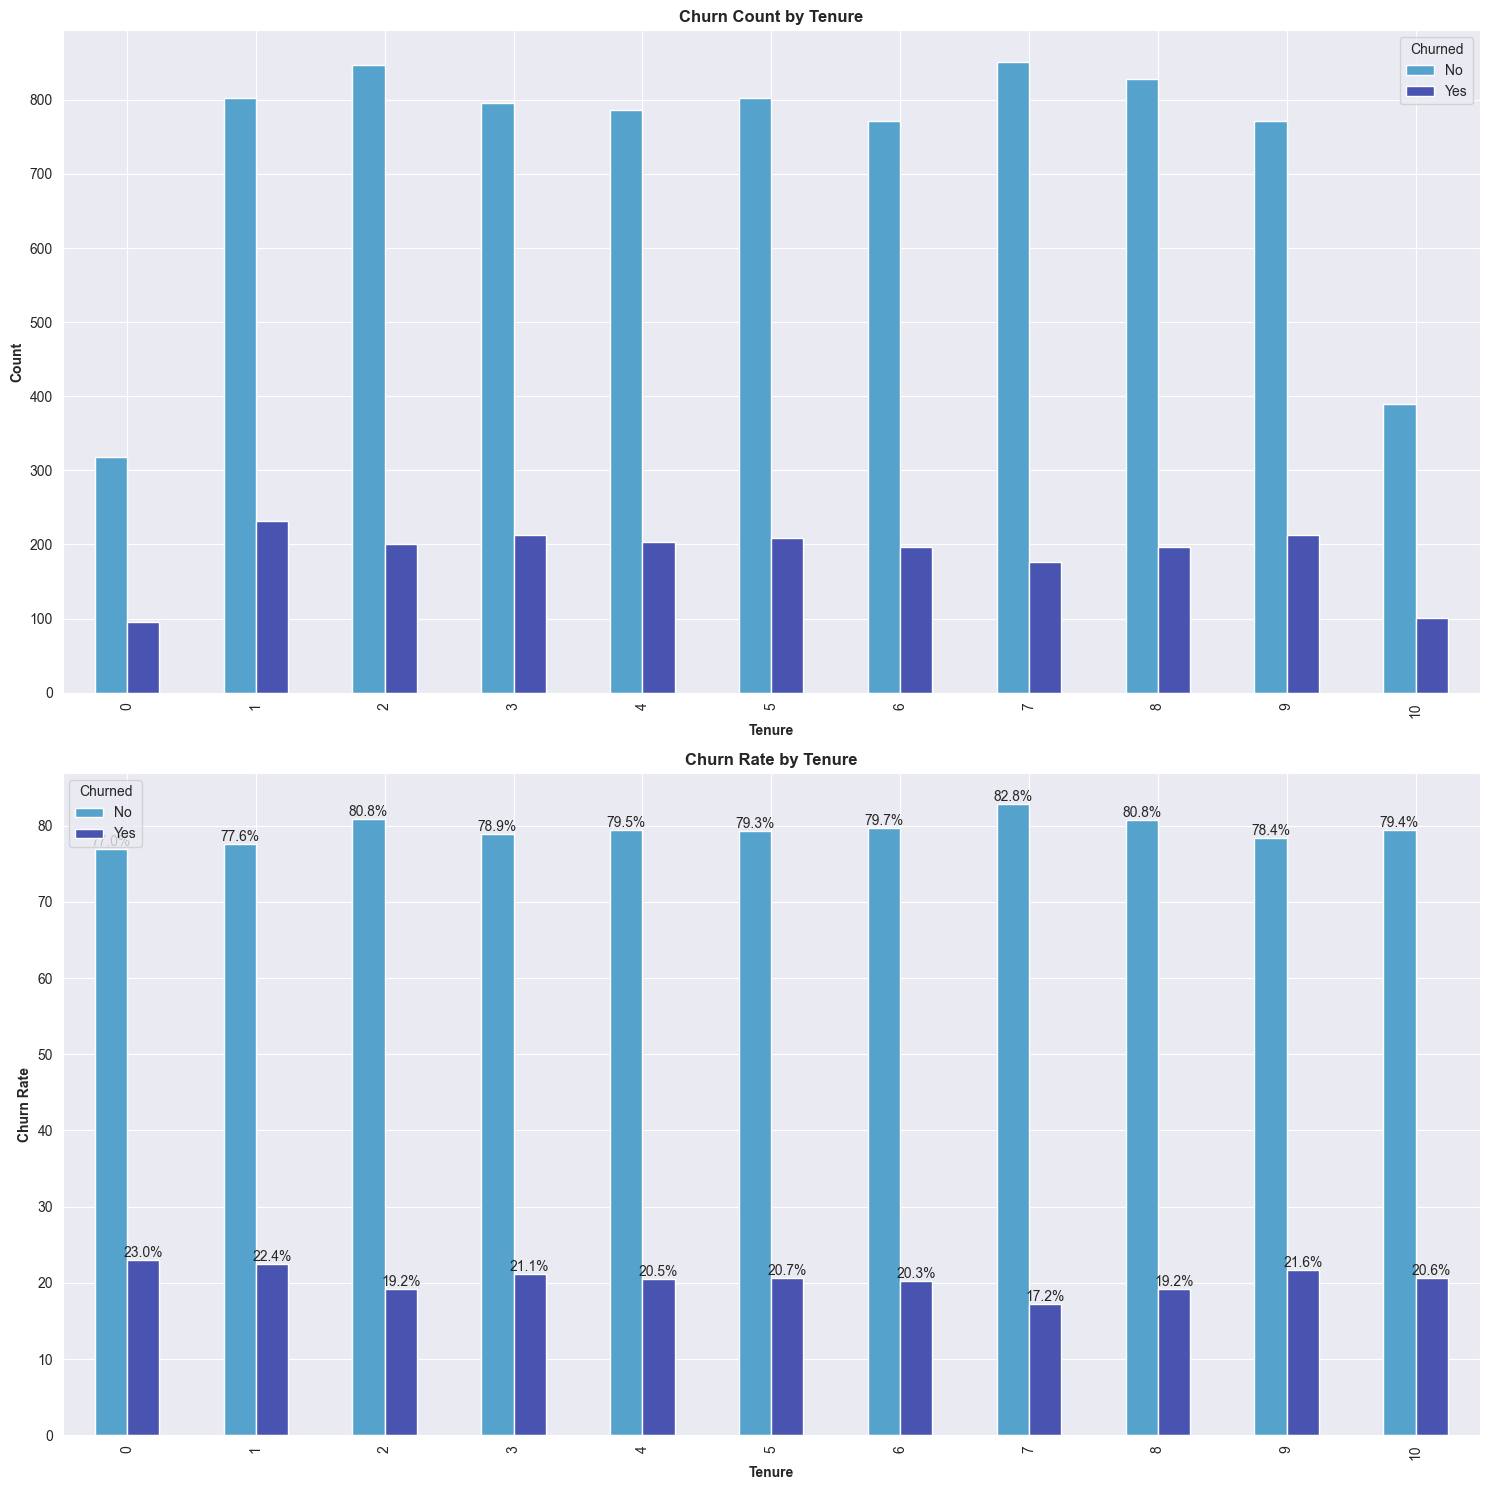

In [19]:
 # Getting the contingency table 
crosstab5 = pd.crosstab( DATA['Tenure'] , DATA['Churned'] ) 
crosstab_5 = pd.crosstab( DATA['Tenure'] , DATA['Churned'] , normalize = 'index' ) * 100

# Plotting the bar plot with the crosstab result
fig , ax = plt.subplots( 2 , 1 ,figsize = ( 15, 15 ))

crosstab5.plot(kind='bar', stacked=False, ax = ax[0])
crosstab_5.plot(kind='bar', stacked=False, ax = ax[1])

ax[0].set_title( 'Churn Count by Tenure' , fontweight = 'bold')
ax[0].set_ylabel( 'Count' , fontweight = 'bold')
ax[0].set_xlabel('Tenure' , fontweight = 'bold')

ax[1].set_title( 'Churn Rate by Tenure' , fontweight = 'bold')
ax[1].set_ylabel( 'Churn Rate' , fontweight = 'bold')
ax[1].set_xlabel('Tenure' , fontweight = 'bold')

 # Annotating the bars 
for p in ax[1].patches:
    height = p.get_height()
    
    ax[1].annotate(f'{height:.1f}%', 
                (p.get_x() + p.get_width() / 2., height),  
                ha='center', va='bottom')  
    
fig.tight_layout()
plt.show()


From the plots, we observe that the majority of customers have been with the bank for 2 and 7 years, while those with 0 years of tenure represent the minority. Additionally, customers who have stayed for less than a year exhibit the highest churn rate at 23.0%, whereas those with 7 years of tenure have the lowest churn rate at 17.2%.

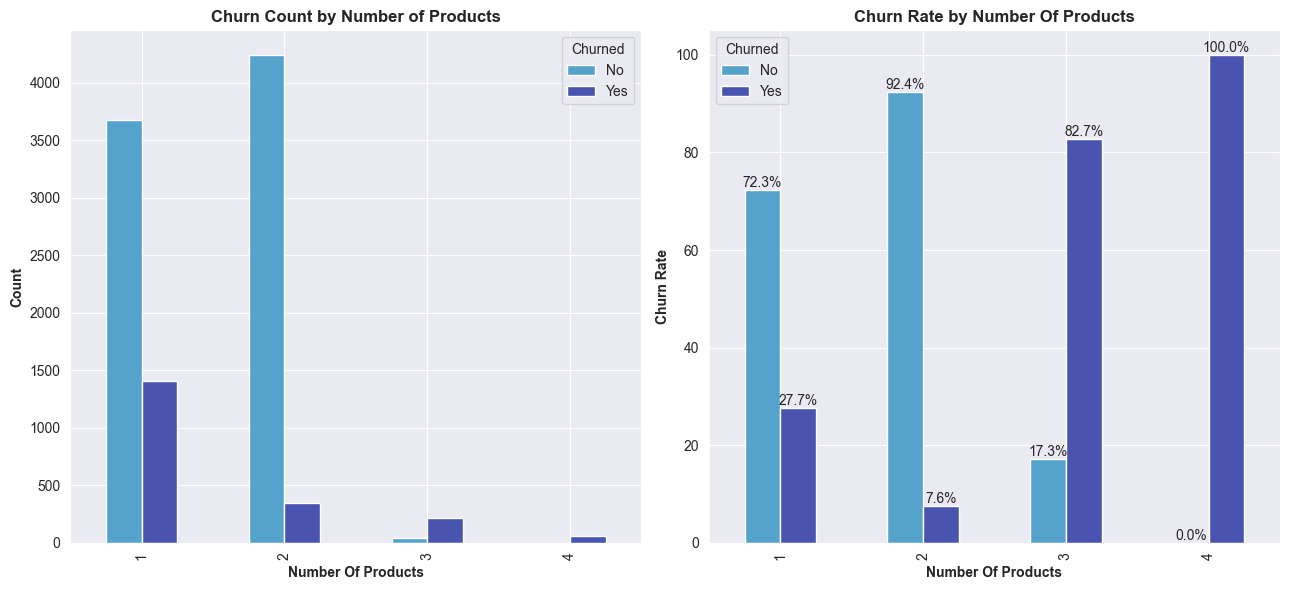

In [20]:
 # Getting the contingency table 
crosstab6 = pd.crosstab( DATA['NumOfProducts'] , DATA['Churned'] ) 
crosstab_6 = pd.crosstab( DATA['NumOfProducts'] , DATA['Churned'] , normalize = 'index' ) * 100

# Plotting the bar plot with the crosstab result
fig , ax = plt.subplots( 1 , 2 ,figsize = ( 13, 6 ))

crosstab6.plot(kind='bar', stacked=False, ax = ax[0])
crosstab_6.plot(kind='bar', stacked=False, ax = ax[1])

ax[0].set_title( 'Churn Count by Number of Products' , fontweight = 'bold')
ax[0].set_ylabel( 'Count' , fontweight = 'bold')
ax[0].set_xlabel('Number Of Products' , fontweight = 'bold')

ax[1].set_title( 'Churn Rate by Number Of Products' , fontweight = 'bold')
ax[1].set_ylabel( 'Churn Rate' , fontweight = 'bold')
ax[1].set_xlabel('Number Of Products' , fontweight = 'bold')

 # Annotating the bars 
for p in ax[1].patches:
    height = p.get_height()
    
    ax[1].annotate(f'{height:.1f}%', 
                (p.get_x() + p.get_width() / 2., height),  
                ha='center', va='bottom')  
    
fig.tight_layout()
plt.show()


From the plots, we observe that most customers hold two or fewer products, while those with three or four products are in the minority. Additionally, customers with four products have the highest churn rate at 100%, followed by those with three products at 82.7%. This suggests a clear trend: as the number of products increases, so does the churn rate

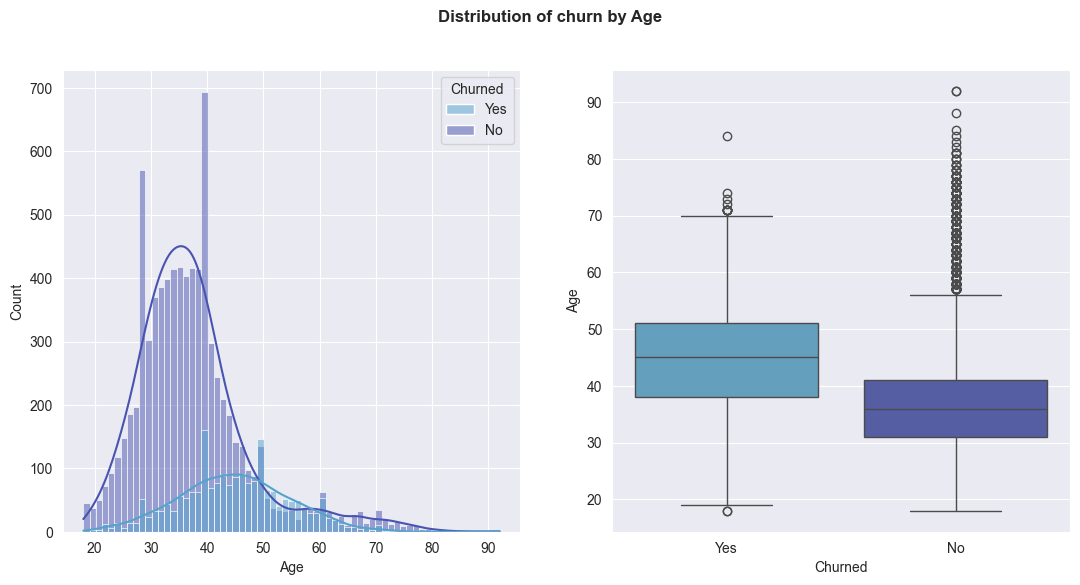

In [21]:
fig , ax = plt.subplots( 1 , 2 , figsize = ( 13 , 6 ) )
sns.histplot( x = 'Age' , hue = 'Churned' , data = DATA , kde=True , ax = ax[0])
sns.boxplot( x = 'Churned' , y = 'Age' , hue = 'Churned' , data = DATA , ax = ax[1])

plt.suptitle('Distribution of churn by Age' , fontweight = 'bold')

plt.show()

The plots reveal that the age distributions of both churned and non-churned individuals are right-skewed, with the churned group exhibiting a more pronounced skew. For non-churned customers, ages are primarily concentrated between 30 and 40, peaking at 40. In contrast, churned customers' ages are concentrated between 35 and 50, also peaking at 40. Notably, the density of churned customers is higher among older individuals.

We also observe that the churned group has greater variation in ages, and their median age is higher than that of the non-churned group, which contains more outliers. The non-churned group is more concentrated around younger ages.

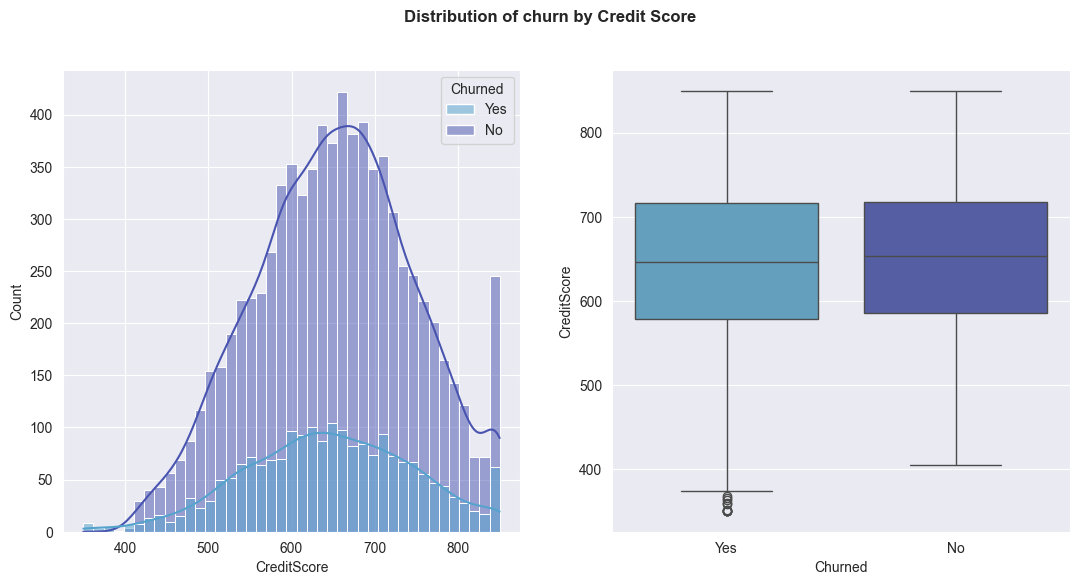

In [22]:
fig , ax = plt.subplots( 1 , 2 , figsize = ( 13 , 6 ) )
sns.histplot( x = 'CreditScore' ,hue = 'Churned' , data = DATA , kde=True , ax = ax[0])
sns.boxplot( x = 'Churned' , y = 'CreditScore' , hue='Churned' , data = DATA , ax = ax[1])

plt.suptitle('Distribution of churn by Credit Score' , fontweight = 'bold')

plt.show()

We observe that the distributions of both churned and non-churned customers are slightly left-skewed. The credit scores of churned customers are primarily concentrated between 600 and 700, with a peak around 640, while non-churned customers are also concentrated between 600 and 700, peaking slightly higher at 650.

Additionally, the churned group shows slightly more variation in credit scores and contains outliers, whereas the non-churned group does not. Despite these differences, the median credit score for both groups is the same.

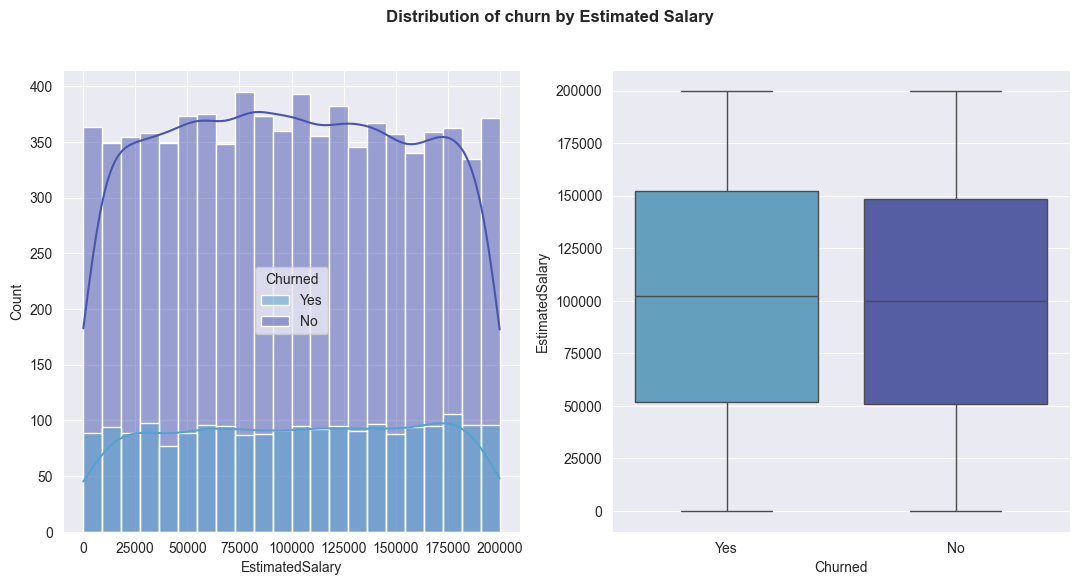

In [23]:
fig , ax = plt.subplots( 1 , 2 , figsize = ( 13 , 6 ) )
sns.histplot( x = 'EstimatedSalary' ,hue = 'Churned' , data = DATA , kde=True , ax = ax[0])
sns.boxplot( x = 'Churned' , y = 'EstimatedSalary' , hue='Churned' , data = DATA , ax = ax[1])

plt.suptitle('Distribution of churn by Estimated Salary' , fontweight = 'bold')

plt.show()

From the plots, we observe that both churned and non-churned customers exhibit a uniform distribution. Additionally, both groups have similar median salaries and variations.

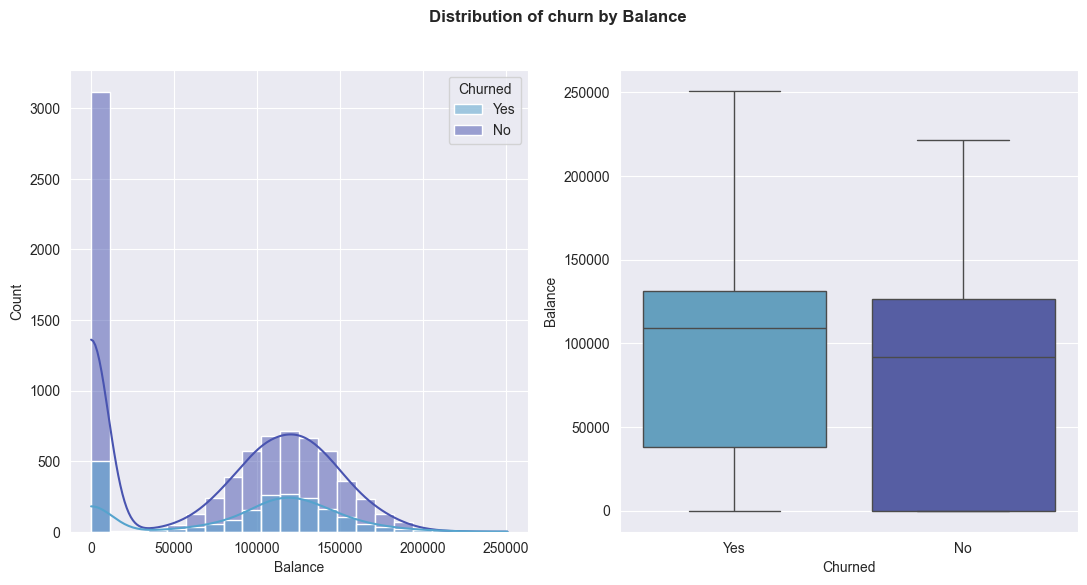

In [24]:
fig , ax = plt.subplots( 1 , 2 , figsize = ( 13 , 6 ) )
sns.histplot( x = 'Balance' ,hue = 'Churned' , data = DATA , kde=True , ax = ax[0])
sns.boxplot( x = 'Churned' , y = 'Balance' , hue='Churned' , data = DATA , ax = ax[1])

plt.suptitle('Distribution of churn by Balance' , fontweight = 'bold')

plt.show()

We observe that both distributions are normally distributed, with the balance of non-churned customers concentrated between 100,000 and 150,000, peaking at 130,000. In contrast, the balance of churned customers is also concentrated within the same range but peaks at 130,000.

Additionally, the churned group exhibits  higher variation than the non churned customers. The median balance of churned is higer than the median balance of non churned customers 